In [ ]:
# Importing Library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder , LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error



In [125]:
data = pd.read_csv("flights.csv")



df = pd.DataFrame(data)
print("First 5 rows:\n\n", df.head(), "\n\n\n")
print("Shape of df:\n\n", df.shape, "\n\n\n")
print("Missing values:\n\n", df.isnull().sum(), "\n\n\n")


First 5 rows:

        Airline Date_of_Journey    Source Destination                  Route  \
0       IndiGo      24-03-2019  Banglore   New Delhi              BLR → DEL   
1    Air India      01-05-2019   Kolkata    Banglore  CCU → IXR → BBI → BLR   
2  Jet Airways      09-06-2019     Delhi      Cochin  DEL → LKO → BOM → COK   
3       IndiGo      12-05-2019   Kolkata    Banglore        CCU → NAG → BLR   
4       IndiGo      01-03-2019  Banglore   New Delhi        BLR → NAG → DEL   

  Dep_Time      Arrival_Time Duration Total_Stops Additional_Info  Price  
0    22:20  22-03-2025 01:10   2h 50m    non-stop         No info   3897  
1    05:50             13:15   7h 25m     2 stops         No info   7662  
2    09:25  10-06-2025 04:25      19h     2 stops         No info  13882  
3    18:05             23:30   5h 25m      1 stop         No info   6218  
4    16:50             21:35   4h 45m      1 stop         No info  13302   



Shape of df:

 (10683, 11) 



Missing values:

 Airlin

In [126]:
df.drop_duplicates(inplace=True)

df['Total_Stops'].fillna(df['Total_Stops'].mode()[0], inplace=True)
df['Route'].fillna(df['Route'].mode()[0], inplace=True)

print("Shape after cleaning:", df.shape)
print("Missing values after cleaning:\n", df.isnull().sum())


Shape after cleaning: (10463, 11)
Missing values after cleaning:
 Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64


In [128]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24-03-2019,Banglore,New Delhi,BLR → DEL,22:20,22-03-2025 01:10,2h 50m,non-stop,No info,3897
1,Air India,01-05-2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,09-06-2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,10-06-2025 04:25,19h,2 stops,No info,13882
3,IndiGo,12-05-2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01-03-2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


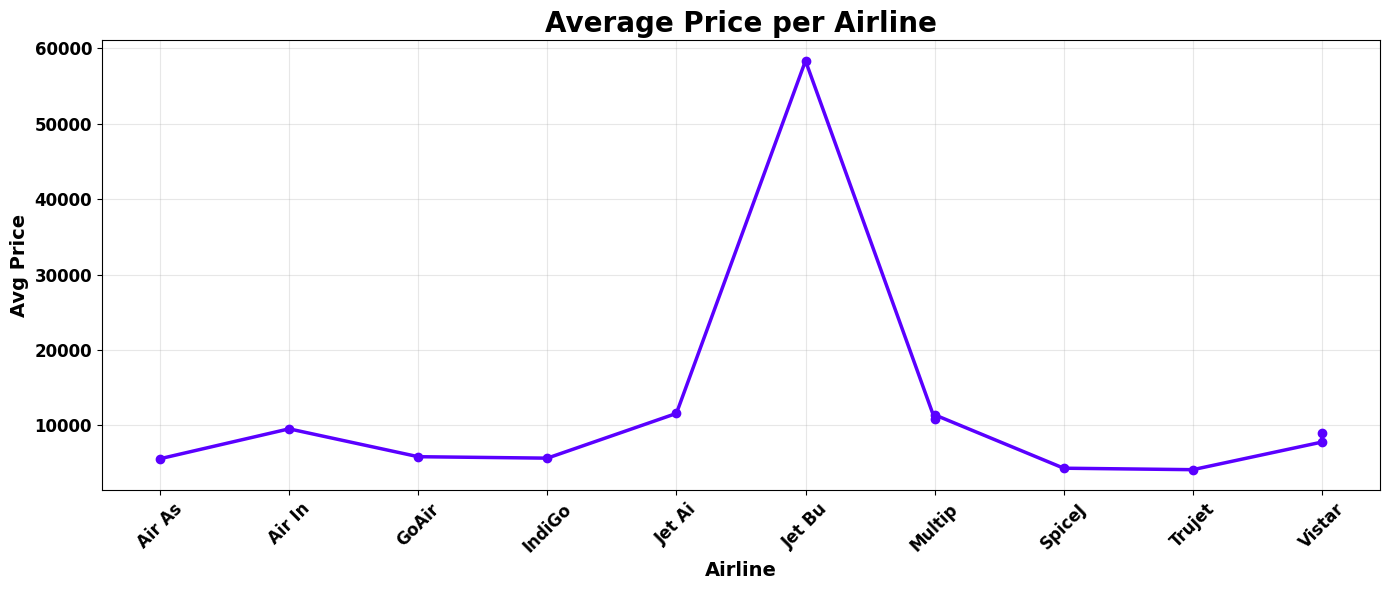

In [129]:
df["Airline"] = df["Airline"].replace({
    "Jet Airways Business": "Jet Business"   # 2 airline same name 
})

df_air = df.groupby("Airline")["Price"].mean().reset_index()
df_air["Short"] = df_air["Airline"].str[:6]

plt.figure(figsize=(14,6))

# Pure clean line (NO CI ever)
plt.plot(df_air["Short"], df_air["Price"], marker="o", linewidth=2.5, color="#5A00FF")

# Bold ticks
plt.xticks(rotation=45, fontsize=12, fontweight="bold")
plt.yticks(fontsize=12, fontweight="bold")

# Labels
plt.xlabel("Airline", fontsize=14, fontweight="bold")
plt.ylabel("Avg Price", fontsize=14, fontweight="bold")
plt.title("Average Price per Airline", fontsize=20, fontweight="bold")

plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

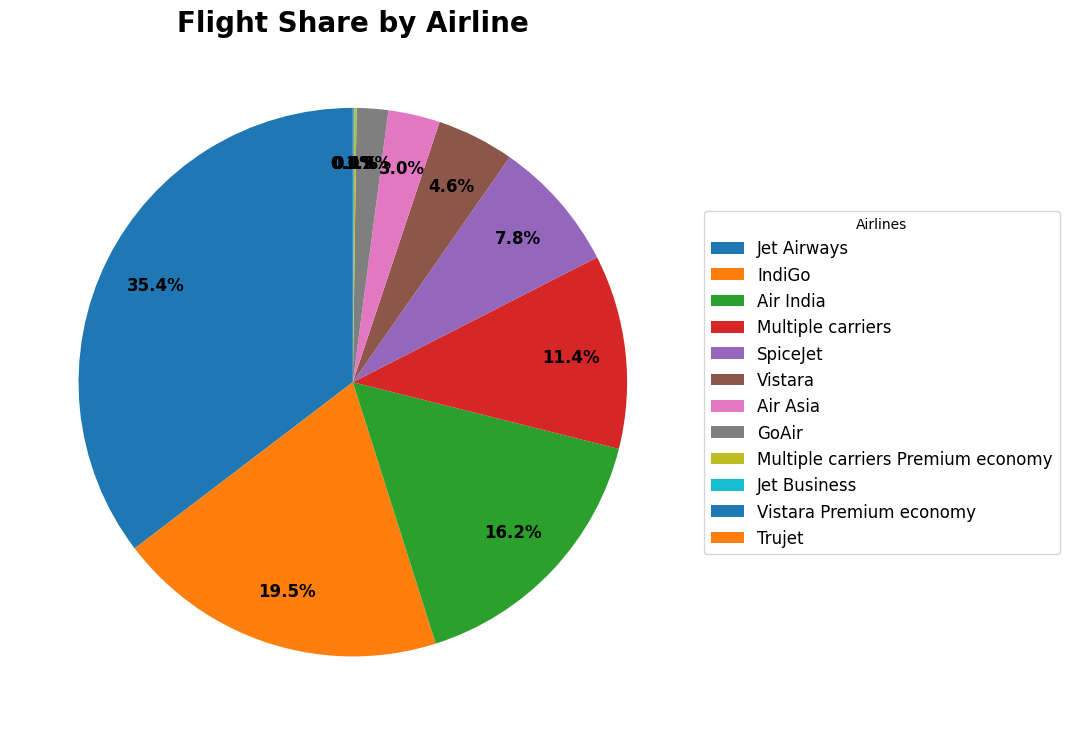

In [130]:

air_count = df["Airline"].value_counts()

plt.figure(figsize=(10,8))

plt.pie(
    air_count.values,
    autopct="%1.1f%%",
    startangle=90,
    pctdistance=0.80,     # ← percent text ko thoda bahar laata hai
    labeldistance=1.10,   # ← labels ko bilkul bahar side me clear
    textprops={"fontsize":12, "fontweight":"bold"}
)

# Legend on side
plt.legend(
    air_count.index,
    title="Airlines",
    loc="center left",
    bbox_to_anchor=(1, 0.5),
    fontsize=12
)

plt.title("Flight Share by Airline", fontsize=20, fontweight="bold")
plt.tight_layout()
plt.show()


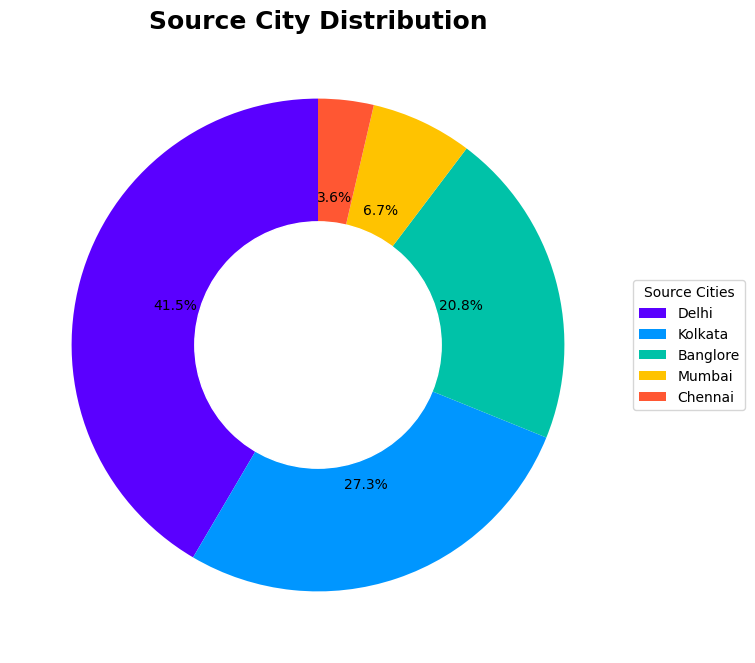

In [131]:
import matplotlib.pyplot as plt

source_count = df["Source"].value_counts()

# Premium colors (same as before)
colors = ["#5A00FF", "#0096FF", "#00C2A8", "#FFC300", "#FF5733"]

plt.figure(figsize=(10,8))

# Simple pie (no extra params)
plt.pie(
    source_count.values,
    colors=colors,
    autopct="%1.1f%%",
    startangle=90
)

# Donut hole
centre = plt.Circle((0,0), 0.50, color="white")
plt.gca().add_artist(centre)

# Legend
plt.legend(
    source_count.index,
    title="Source Cities",
    loc="center left",
    bbox_to_anchor=(1,0.5)
)

plt.title("Source City Distribution", fontsize=18, fontweight="bold")
plt.show()


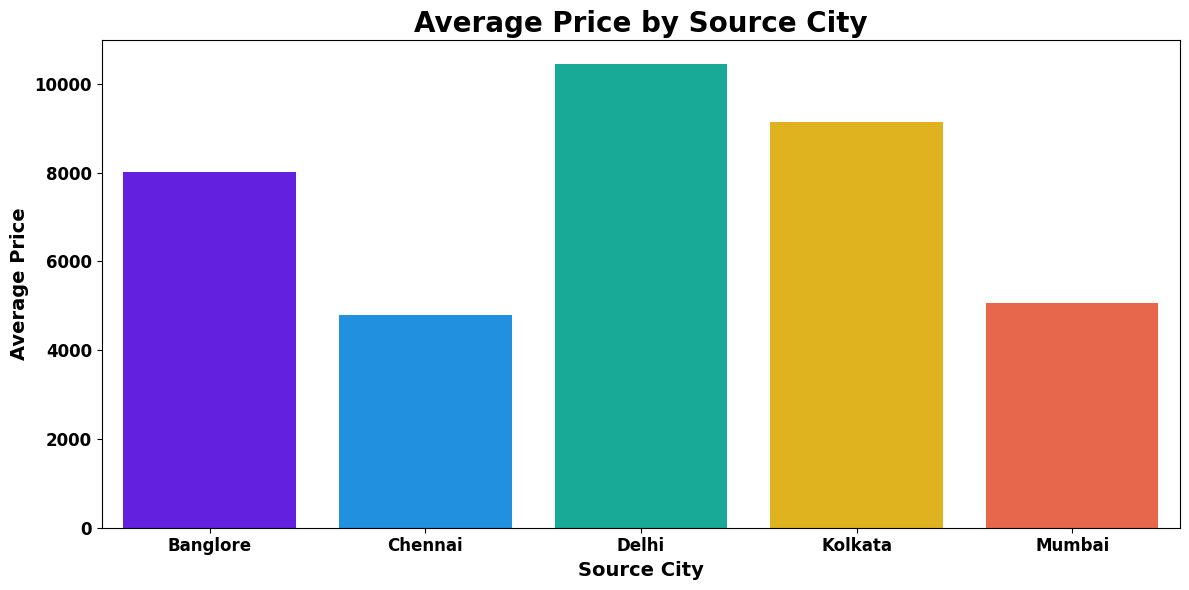

In [132]:
# Calculate averages
source_avg = df.groupby("Source")["Price"].mean().reset_index()

# Premium colors (same theme)
colors = ["#5A00FF", "#0096FF", "#00C2A8", "#FFC300", "#FF5733"]

plt.figure(figsize=(12,6))

sns.barplot(
    data=source_avg,
    x="Source",
    y="Price",
    palette=colors
)

plt.xlabel("Source City", fontsize=14, fontweight="bold")
plt.ylabel("Average Price", fontsize=14, fontweight="bold")
plt.title("Average Price by Source City", fontsize=20, fontweight="bold")

plt.xticks(fontsize=12, fontweight="bold")
plt.yticks(fontsize=12, fontweight="bold")

plt.tight_layout()
plt.show()


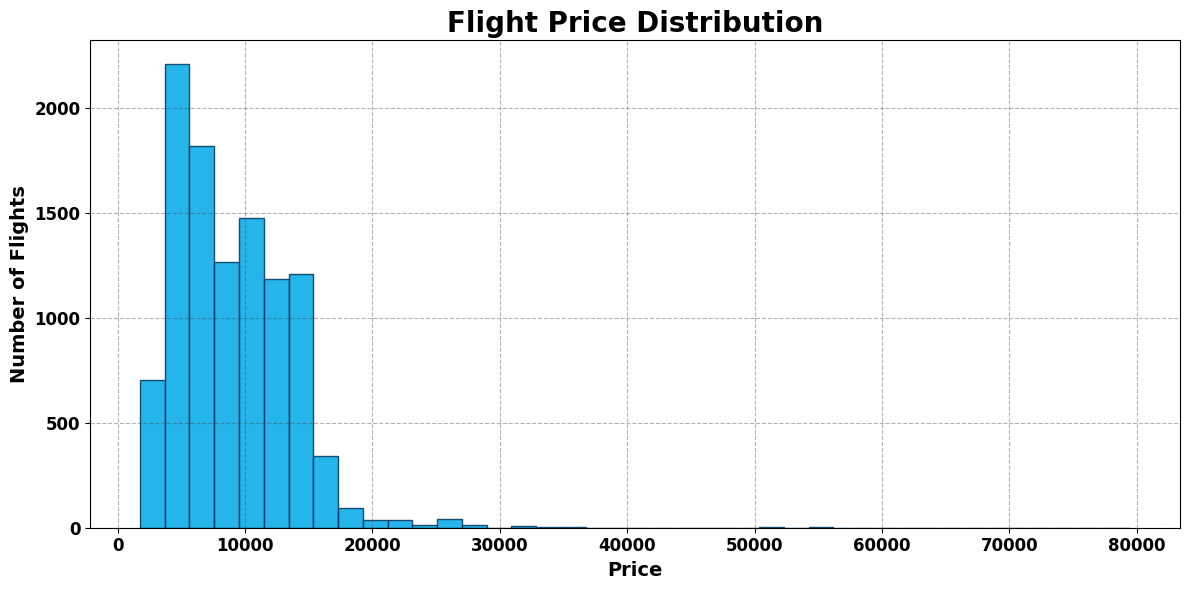

In [133]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))

plt.hist(
    df["Price"],
    bins=40,
    color="#00A8E8",      # premium teal blue
    edgecolor="#003459",  # dark navy border (clean look)
    alpha=0.85,
)

plt.xlabel("Price", fontsize=14, fontweight="bold")
plt.ylabel("Number of Flights", fontsize=14, fontweight="bold")
plt.title("Flight Price Distribution", fontsize=20, fontweight="bold")

plt.xticks(fontsize=12, fontweight="bold")
plt.yticks(fontsize=12, fontweight="bold")

# Dark grey grid for premium contrast
plt.grid(color="#444444", alpha=0.4, linestyle="--")

plt.tight_layout()
plt.show()


In [134]:
# Fix Dates & Time Columns
df["Journey_Day"] = pd.to_datetime(df["Date_of_Journey"], dayfirst=True).dt.day
df["Journey_Month"] = pd.to_datetime(df["Date_of_Journey"], dayfirst=True).dt.month

df["Dep_Hour"] = pd.to_datetime(df["Dep_Time"]).dt.hour
df["Dep_Min"]  = pd.to_datetime(df["Dep_Time"]).dt.minute

df["Arr_Time_Fixed"] = pd.to_datetime(df["Arrival_Time"], format="mixed", dayfirst=True)
df["Arr_Hour"] = df["Arr_Time_Fixed"].dt.hour
df["Arr_Min"]  = df["Arr_Time_Fixed"].dt.minute

# Duration fix
def get_duration(x):
    h = 0; m = 0
    if "h" in x: h = int(x.split("h")[0])
    if "m" in x: m = int(x.split("h")[-1].replace("m",""))
    return h*60 + m

df["Duration_Minutes"] = df["Duration"].apply(get_duration)


In [135]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df["Airline"] = le.fit_transform(df["Airline"])
df["Source"] = le.fit_transform(df["Source"])
df["Destination"] = le.fit_transform(df["Destination"])
df["Route"] = le.fit_transform(df["Route"])
df["Total_Stops"] = le.fit_transform(df["Total_Stops"])
df["Additional_Info"] = le.fit_transform(df["Additional_Info"])


In [136]:
X = df[[ 
    "Airline","Source","Destination","Route","Total_Stops",
    "Journey_Day","Journey_Month","Dep_Hour","Dep_Min",
    "Arr_Hour","Arr_Min","Duration_Minutes"
]]

y = df["Price"]


In [137]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import pickle

# ================== TRAIN TEST SPLIT ==================
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# ================== MODEL 1: LINEAR REGRESSION ==================
lr = LinearRegression()
lr.fit(X_train, y_train)

pred_lr = lr.predict(X_test)
acc_lr = r2_score(y_test, pred_lr) * 100

print("\n--- Linear Regression ---")
print("Accuracy:", round(acc_lr, 2), "%")

# ================== MODEL 2: RANDOM FOREST ==================
rf = RandomForestRegressor(
    n_estimators=300,
    random_state=42,
    max_depth=20,
    min_samples_split=5
)

rf.fit(X_train, y_train)
pred_rf = rf.predict(X_test)

acc_rf = r2_score(y_test, pred_rf) * 100

print("\n--- Random Forest ---")
print("Accuracy:", round(acc_rf, 2), "%")

# ================== DECIDE BEST ==================
if acc_rf > acc_lr:
    model = rf
    name = "Random Forest"
    acc = acc_rf
else:
    model = lr
    name = "Linear Regression"
    acc = acc_lr

print("\nBest Model:", name)
print("Best Accuracy:", round(acc, 2), "%")

# ================== SAVE BEST MODEL ==================
pickle.dump(best, open("best_model.pkl", "wb"))
print("\nModel Saved Successfully!")



--- Linear Regression ---
Accuracy: 42.2 %

--- Random Forest ---
Accuracy: 82.62 %

Best Model: Random Forest
Best Accuracy: 82.62 %

Model Saved Successfully!


In [138]:
print(X_train.columns)


Index(['Airline', 'Source', 'Destination', 'Route', 'Total_Stops',
       'Journey_Day', 'Journey_Month', 'Dep_Hour', 'Dep_Min', 'Arr_Hour',
       'Arr_Min', 'Duration_Minutes'],
      dtype='object')


In [139]:
# ===================== Encodings (OLD PROJECT) =====================
source_encode = {"DEL":0, "BOM":3, "BLR":2, "CCU":1, "HYD":4}
dest_encode   = {"DEL":0, "BOM":1, "BLR":2, "CCU":3, "HYD":4}

airline_name = {
    3: "IndiGo",
    1: "Air India",
    4: "Vistara",
    8: "SpiceJet",
    6: "Akasa Air",
    2: "AirAsia"
}

# ===================== Route code =====================
def get_route_code(s, d):
    return s * 10 + d      # → SAME as old project


# ===================== USER INPUT =====================
source_city      = "DEL"
destination_city = "HYD"

journey_day   = 26
journey_month = 3
journey_year  = 2026

dep_hour = 14
arr_hour = 17


# ===================== ENCODING =====================
source      = source_encode[source_city]
destination = dest_encode[destination_city]


# ===================== DURATION =====================
duration_minutes = (arr_hour - dep_hour) * 60
if duration_minutes < 0:
    duration_minutes += 1440


# ===================== Route =====================
route_code = get_route_code(source, destination)


# ===================== PREDICT ALL AIRLINES =====================
results = []

for airline in airline_name.keys():

    # ⚠ IMPORTANT — EXACT SAME FEATURE ORDER USED DURING TRAINING
    row = [[
        airline,           # 1 Airline
        source,            # 2 Source
        destination,       # 3 Destination
        route_code,        # 4 Route_Code
        0,                 # 5 Total_Stops
        journey_day,       # 6 Journey_Day
        journey_month,     # 7 Journey_Month
        dep_hour,          # 8 Dep_Hour
        0,                 # 9 Dep_Min
        arr_hour,          #10 Arr_Hour
        0,                 #11 Arr_Min
        duration_minutes   #12 Duration_Minutes
    ]]

    price = model.predict(row)[0]

    results.append([airline_name[airline], round(price, 2)])


# ===================== SORTING =====================
results.sort(key=lambda x: x[1])


# ===================== OUTPUT =====================
print(f"\nFLIGHT PREDICTION for {source_city} → {destination_city}")
print(f"Date: {journey_day}-{journey_month}-{journey_year}")
print(f"Time: {dep_hour}:00 → {arr_hour}:00\n")

for r in results:
    print(f"{r[0]} → ₹{r[1]}")

best = results[0]

print("\nBEST OPTION")
print(f"Airline: {best[0]}")
print(f"Price: ₹{best[1]}")



FLIGHT PREDICTION for DEL → HYD
Date: 26-3-2026
Time: 14:00 → 17:00

Vistara → ₹8849.1
Air India → ₹9075.12
IndiGo → ₹9084.64
AirAsia → ₹9136.14
SpiceJet → ₹11607.19
Akasa Air → ₹11632.51

BEST OPTION
Airline: Vistara
Price: ₹8849.1


In [140]:
print(X_train.shape)



(8370, 12)


In [141]:
print(X_train.columns)

Index(['Airline', 'Source', 'Destination', 'Route', 'Total_Stops',
       'Journey_Day', 'Journey_Month', 'Dep_Hour', 'Dep_Min', 'Arr_Hour',
       'Arr_Min', 'Duration_Minutes'],
      dtype='object')
